# Občine


Analiza podatkov o občinah.

## Župani


In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.mpl_style', 'default')
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)
plt.rcParams['figure.figsize'] = (15, 5)

seznam_obcin = pd.read_csv('csv-datoteke/index.csv')
podatki_2014 = pd.read_csv('csv-datoteke/2010-2014.csv')
podatki_brez_2010 = pd.read_csv('csv-datoteke/2006-2010.csv')
podatki_2006 = pd.read_csv('csv-datoteke/2002-2006.csv')
podatki_2002 = pd.read_csv('csv-datoteke/1998-2002.csv')
podatki_1998 = pd.read_csv('csv-datoteke/1994-1998.csv')
podatki_naselja = pd.read_csv('csv-datoteke/naselja.csv')
pd.options.display.max_rows = 30

c:\program files (x86)\python35-32\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


**Tabela županov, ki so dobili dva zaporedna mandata za obdobje 2014-2018 in 2010-2014.**

**Tabela županov, ki so dobili dva zaporedna mandata za obdobje 2006-2010 in 2010-2014.**

In [4]:
mandat_2 = pd.merge(podatki_2014[['obcina', 'zupan']], podatki_brez_2010, on='zupan', suffixes=('_2014', '_2010'))

In [5]:
mandat_2.head(10)

,obcina_2014,zupan,obcina_2010
0,Občina Ajdovščina,Marjan Poljšak,Občina Ajdovščina
1,Občina Benedikt,Milan Gumzar,Občina Benedikt
2,Občina Bled,Janez Fajfar,Občina Bled
3,Občina Bloke,Jože Doles,Občina Bloke
4,Občina Bohinj,Franc Kramar,Občina Bohinj
5,Občina Borovnica,Andrej Ocepek,Občina Borovnica
6,Občina Bovec,Danijel Krivec,Občina Bovec
7,Občina Brda,Franc Mužič,Občina Brda
8,Občina Brezovica,Metod Ropret,Občina Brezovica
9,Občina Brežice,Ivan Molan,Občina Brežice


In [6]:
mandat_2[['zupan']].count()

zupan    141
dtype: int64

In [7]:
podatki_2014[['zupan']].count()

zupan    208
dtype: int64

In [8]:
podatki_brez_2010[['zupan']].count()

zupan    210
dtype: int64

In [9]:
odstotek_zupanov = mandat_2[['zupan']].count() / podatki_2014[['zupan']].count()

In [10]:
odstotek_zupanov

zupan    0.677885
dtype: float64

Združil sem tabeli podatki_2014 in podatki_brez_2010 po stolpcu zupan in tako dobil tabelo vseh županov, ki so bili dva mandata na oblasti. Nato sem delil število županov z dvema mandatoma s številom vseh županov in dobil delež teh županov.

**Tabela županov, ki so dobili dva zaporedna mandata za obdobje 2002-2006 in 2006-2010.**

In [11]:
mandat_3 = pd.merge(podatki_brez_2010, podatki_2006[['obcina', 'zupan']], on='zupan', suffixes=('_2010', '_2006'))

In [12]:
mandat_3.head(10)

,obcina_2010,zupan,obcina_2006
0,Občina Ajdovščina,Marjan Poljšak,Občina Ajdovščina
1,Občina Beltinci,Milan Kerman,Občina Beltinci
2,Občina Benedikt,Milan Gumzar,Občina Benedikt
3,Občina Bistrica ob Sotli,Jožef Pregrad,Občina Bistrica ob Sotli
4,Občina Bloke,Jože Doles,Občina Bloke
5,Občina Braslovče,Marko Balant,Občina Braslovče
6,Občina Brda,Franc Mužič,Občina Brda
7,Občina Cankova,Drago Vogrinčič,Občina Cankova
8,Mestna občina Celje,Bojan Šrot,Mestna občina Celje
9,Občina Cerklje na Gorenjskem,Franc Čebulj,Občina Cerklje na Gorenjskem


In [13]:
mandat_3[['zupan']].count()

zupan    120
dtype: int64

In [14]:
podatki_brez_2010[['zupan']].count()

zupan    210
dtype: int64

In [15]:
podatki_2006[['zupan']].count()

zupan    192
dtype: int64

In [16]:
odstotek_zupanov_2 = mandat_3[['zupan']].count() / podatki_2006[['zupan']].count()

In [17]:
odstotek_zupanov_2

zupan    0.625
dtype: float64

**Tabela županov, ki so dobili dva zaporedna mandata za obdobje 1998-2002 in 2002-2006.**

In [18]:
mandat_4 = pd.merge(podatki_2006[['obcina', 'zupan']], podatki_2002[['obcina', 'zupan']], on='zupan', suffixes=('_2006', '_2002'))

In [19]:
mandat_4.head(10)

,obcina_2006,zupan,obcina_2002
0,Občina Benedikt,Milan Gumzar,Občina Benedikt
1,Občina Bistrica ob Sotli,Jožef Pregrad,Občina Bistrica ob Sotli
2,Občina Bloke,Jože Doles,Občina Bloke
3,Občina Borovnica,Alojz Močnik,Občina Borovnica
4,Občina Brda,Franc Mužič,Občina Brda
5,Občina Brezovica,Drago Stanovnik,Občina Brezovica
6,Mestna občina Celje,Bojan Šrot,Mestna občina Celje
7,Občina Cerklje na Gorenjskem,Franc Čebulj,Občina Cerklje na Gorenjskem
8,Občina Cerkno,Jurij Kavčič,Občina Cerkno
9,Občina Cerkvenjak,Jože Kraner,Občina Cerkvenjak


In [20]:
mandat_4[['zupan']].count()

zupan    134
dtype: int64

In [21]:
podatki_2006[['zupan']].count()

zupan    192
dtype: int64

In [22]:
podatki_2002[['zupan']].count()

zupan    192
dtype: int64

In [23]:
odstotek_zupanov_3 = mandat_4[['zupan']].count() / podatki_2002[['zupan']].count()

In [24]:
odstotek_zupanov_3

zupan    0.697917
dtype: float64

Iz izračunov vidimo, da se procent županov z dvema zaporednima mandatoma ni veliko spreminjal med leti. Ta odstotek varira nekje med 60 % in 70 %. Torej volilci zaupajo približno dva mandata zapored 2 / 3 županov.S primerjavo tabel lahko opazimo, da so med njimi tudi župani, ki so vsaj 3 ali več zaporednih mandatov na oblasti.

In [25]:
mandat_5=pd.merge(podatki_2002[['obcina', 'zupan']], podatki_1998[['obcina', 'zupan']], on='zupan', suffixes=('_2002', '_1998'))

In [26]:
mandat_5.head(10)

,obcina_2002,zupan,obcina_1998
0,Občina Beltinci,Jožef Kavaš,Občina Beltinci
1,Občina Bohinj,Franc Kramar,Občina Bohinj
2,Občina Brda,Franc Mužič,Občina Brda
3,Občina Brezovica,Drago Stanovnik,Občina Brezovica
4,Občina Cerklje na Gorenjskem,Franc Čebulj,Občina Cerklje na Gorenjskem
5,Občina Cerknica,Valentin Schein,Občina Cerknica
6,Občina Črna na Koroškem,Franc Stakne,Občina Črna na Koroškem
7,Občina Črnomelj,Andrej Fabjan,Občina Črnomelj
8,Občina Destrnik,Franc Pukšič,Občina Destrnik - Trnovska vas
9,Občina Divača,Rajko Vojtkovszky,Občina Divača


In [27]:
mandat_5[['zupan']].count()

zupan    81
dtype: int64

In [28]:
podatki_2002[['zupan']].count()

zupan    192
dtype: int64

In [29]:
podatki_1998[['zupan']].count()

zupan    147
dtype: int64

In [30]:
odstotek_zupanov_4 = mandat_5[['zupan']].count() / podatki_1998[['zupan']].count()

In [31]:
odstotek_zupanov_4

zupan    0.55102
dtype: float64

In [32]:
podatki_naselja.head(10)

,obcina,regija,naselje,prebivalci,povrsina
0,Ajdovščina,GORIŠKA STATISTIČNA REGIJA,45,18959,245
1,Ankaran,OBALNO-KRAŠKA STATISTIČNA REGIJA,1,3219,8
2,Apače,POMURSKA STATISTIČNA REGIJA,21,3591,54
3,Beltinci,POMURSKA STATISTIČNA REGIJA,8,8264,62
4,Benedikt,PODRAVSKA STATISTIČNA REGIJA,13,2461,24
5,Bistrica ob Sotli,SAVINJSKA STATISTIČNA REGIJA,11,1382,31
6,Bled,GORENJSKA STATISTIČNA REGIJA,10,8127,72
7,Bloke,NOTRANJSKO-KRAŠKA STATISTIČNA REGIJA,45,1545,75
8,Bohinj,GORENJSKA STATISTIČNA REGIJA,24,5146,334
9,Borovnica,OSREDNJESLOVENSKA STATISTIČNA REGIJA,12,4250,42


**Spodaj je prikazano število občin v posamezni regiji.**
V Sloveniji imamo 212 občin, kar je zelo veliko glede na velikost države.Iz tabele je razvidno, da je največ občin v Podravski regiji, najmanj pa v Zasavski regiji.
Zanima me tudi, katera pokrajina ima največ občin(Primorska, Gorenjska, Dolenjska, Štajerska, Notranjska, Koroška, Prekmurje, Osrednjeslovenska). To je moja delitev na pokrajine, mednje sem dodal tudi Osrednjeslovensko pokrajino. Na nekaterih virih je samostojna pokrajina, na drugih pa je razdeljena med druge pokrajine. Zaradi lažjega dela, sem vzel tako delitev.
* Koroška ima 12 občin
* Dolenjska ima 25 občin
* Gorenjska ima 18 občin
* Prekmurje ima 27 občin
* Osrednjeslovenska ima 26 občin
* Primorska ima 21 občin
* Notranjska ima 6 občin
* Štajerska ima 77 občin

Vidimo, da ima Štajerska daleč največ občin, kar je tudi pričakovano, saj je največja po površini.

In [33]:
regije = podatki_naselja.groupby('regija')[['obcina']].count()

In [34]:
regije.sort_values('obcina', ascending=[False])

,obcina
regija,
PODRAVSKA STATISTIČNA REGIJA,41
SAVINJSKA STATISTIČNA REGIJA,33
POMURSKA STATISTIČNA REGIJA,27
OSREDNJESLOVENSKA STATISTIČNA REGIJA,26
JUGOVZHODNA SLOVENIJA,20
GORENJSKA STATISTIČNA REGIJA,18
GORIŠKA STATISTIČNA REGIJA,13
KOROŠKA STATISTIČNA REGIJA,12
OBALNO-KRAŠKA STATISTIČNA REGIJA,8


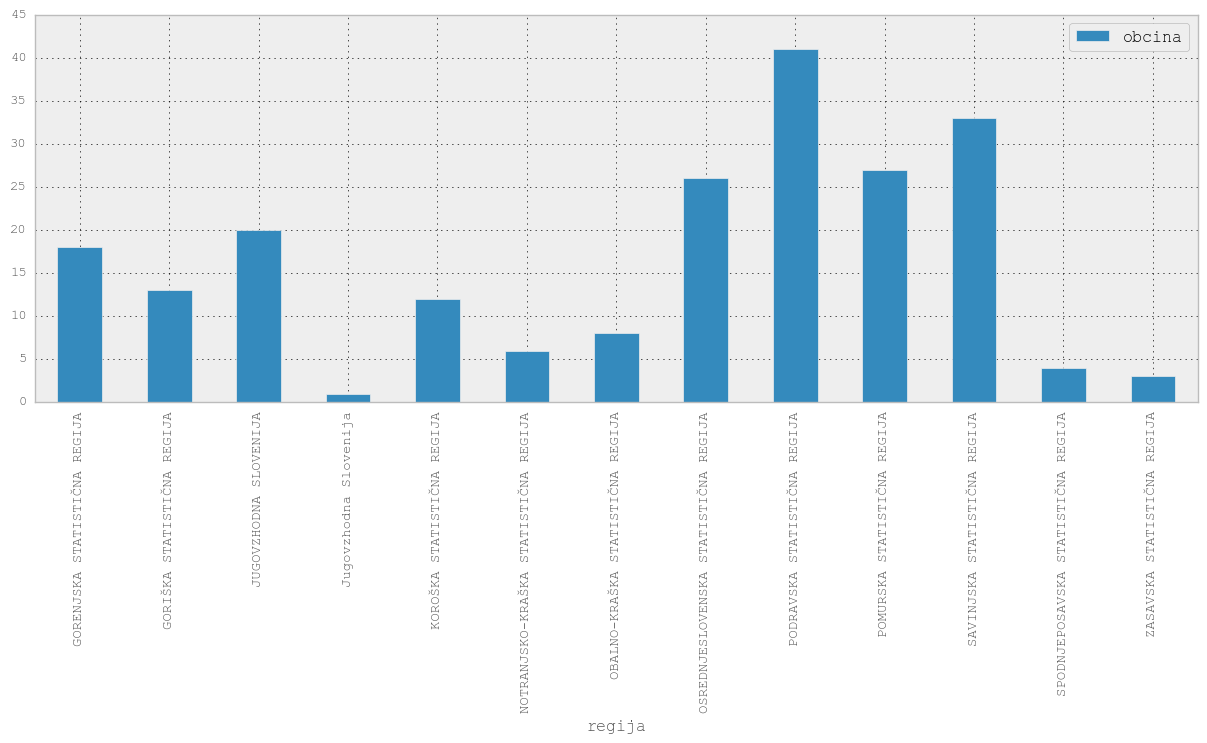

In [35]:
regije.plot(kind='bar')

Zanima me gostota naseljenosti prebivalstva znotraj posamezne občine in primerjava z številom naselij. So občine z večjim številom naselij gosteje poseljene ?

In [36]:
naselja_1 = podatki_naselja[['obcina', 'prebivalci', 'povrsina']]

In [42]:
naselja_1.head(8)

,obcina,prebivalci,povrsina
0,Ajdovščina,18959,245
1,Ankaran,3219,8
2,Apače,3591,54
3,Beltinci,8264,62
4,Benedikt,2461,24
5,Bistrica ob Sotli,1382,31
6,Bled,8127,72
7,Bloke,1545,75


In [41]:
gostota = naselja_1[['prebivalci']] / naselja_1[['povrsina']]
gostota
#komentar

,povrsina,prebivalci
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [ ]:
gostota

In [ ]:
naselja_2 = podatki_naselja[['regija', 'povrsina']].head(10)

In [ ]:
naselja_2.sort_values('povrsina', ascending=[False])